In [1]:
from scipy import signal
from scipy.stats import norm

import numpy as np
import glob
import pandas as pd
from numpy import load

import sys
sys.path.append('../')

from scripts.spectral_analysis import pipeline
from scripts.spectral_analysis import wavelength

In [2]:
def get_spectrum(fn):
    """Function to read spectral data
       Args:
            fn: filename
       Returns:
            wavelength, flux

    """

    data=np.loadtxt(fn)

    normalized =  data[:,1]/data[:,2] #normalize spectrum
    
    wavein = data[:,0]
    flux = data[:,1]/data[:,2]
    

    return wavein, flux

map_of_int = {'a': '0', 'b': '1', 'c':'2',
             'd': '3', 'e': '4', 'f':'5',
             'g':'6', 'h': '7', 'i':'8', 'j':'9'}

def get_idx(fn, path):
    name = fn.replace(path, '').replace('.spec.gz', '')
    idx = name[5:10].translate(str.maketrans(map_of_int))
    return idx

In [3]:
path='/Users/ioanaciuca/Desktop/MockSpectra/Sync_Spectra_All/'

names=[]
for name in glob.glob('/Users/ioanaciuca/Desktop/MockSpectra/Sync_Spectra_All/*'):
    names.append(name)

In [4]:
#let's test this code...

fn = names[2]
print(fn)

idx = get_idx(fn, path)
print(idx)

/Users/ioanaciuca/Desktop/MockSpectra/Sync_Spectra_All/at12_bdaif_t04499g2.14.spec.gz
13085


In [5]:
df = pd.DataFrame()

i=0
for name in names[:1000]:
    waves, flux = get_spectrum(name)
    idx = get_idx(name, path)
    waveout, fluxout = pipeline(wavelength, waves, flux)
    if i == 0:
        df['waves'] = waveout*10
    
    print("Writing spec:", i)
    df['spec'+str(idx)] = fluxout
    i += 1

Writing spec: 0
Writing spec: 1
Writing spec: 2
Writing spec: 3
Writing spec: 4
Writing spec: 5
Writing spec: 6
Writing spec: 7
Writing spec: 8
Writing spec: 9
Writing spec: 10
Writing spec: 11
Writing spec: 12
Writing spec: 13
Writing spec: 14
Writing spec: 15
Writing spec: 16
Writing spec: 17
Writing spec: 18
Writing spec: 19
Writing spec: 20
Writing spec: 21
Writing spec: 22
Writing spec: 23
Writing spec: 24
Writing spec: 25
Writing spec: 26
Writing spec: 27
Writing spec: 28
Writing spec: 29
Writing spec: 30
Writing spec: 31
Writing spec: 32
Writing spec: 33
Writing spec: 34
Writing spec: 35
Writing spec: 36
Writing spec: 37
Writing spec: 38
Writing spec: 39
Writing spec: 40
Writing spec: 41
Writing spec: 42
Writing spec: 43
Writing spec: 44
Writing spec: 45
Writing spec: 46
Writing spec: 47
Writing spec: 48
Writing spec: 49
Writing spec: 50
Writing spec: 51
Writing spec: 52
Writing spec: 53
Writing spec: 54
Writing spec: 55
Writing spec: 56
Writing spec: 57
Writing spec: 58
Writing

Writing spec: 462
Writing spec: 463
Writing spec: 464
Writing spec: 465
Writing spec: 466
Writing spec: 467
Writing spec: 468
Writing spec: 469
Writing spec: 470
Writing spec: 471
Writing spec: 472
Writing spec: 473
Writing spec: 474
Writing spec: 475
Writing spec: 476
Writing spec: 477
Writing spec: 478
Writing spec: 479
Writing spec: 480
Writing spec: 481
Writing spec: 482
Writing spec: 483
Writing spec: 484
Writing spec: 485
Writing spec: 486
Writing spec: 487
Writing spec: 488
Writing spec: 489
Writing spec: 490
Writing spec: 491
Writing spec: 492
Writing spec: 493
Writing spec: 494
Writing spec: 495
Writing spec: 496
Writing spec: 497
Writing spec: 498
Writing spec: 499
Writing spec: 500
Writing spec: 501
Writing spec: 502
Writing spec: 503
Writing spec: 504
Writing spec: 505
Writing spec: 506
Writing spec: 507
Writing spec: 508
Writing spec: 509
Writing spec: 510
Writing spec: 511
Writing spec: 512
Writing spec: 513
Writing spec: 514
Writing spec: 515
Writing spec: 516
Writing sp

Writing spec: 918
Writing spec: 919
Writing spec: 920
Writing spec: 921
Writing spec: 922
Writing spec: 923
Writing spec: 924
Writing spec: 925
Writing spec: 926
Writing spec: 927
Writing spec: 928
Writing spec: 929
Writing spec: 930
Writing spec: 931
Writing spec: 932
Writing spec: 933
Writing spec: 934
Writing spec: 935
Writing spec: 936
Writing spec: 937
Writing spec: 938
Writing spec: 939
Writing spec: 940
Writing spec: 941
Writing spec: 942
Writing spec: 943
Writing spec: 944
Writing spec: 945
Writing spec: 946
Writing spec: 947
Writing spec: 948
Writing spec: 949
Writing spec: 950
Writing spec: 951
Writing spec: 952
Writing spec: 953
Writing spec: 954
Writing spec: 955
Writing spec: 956
Writing spec: 957
Writing spec: 958
Writing spec: 959
Writing spec: 960
Writing spec: 961
Writing spec: 962
Writing spec: 963
Writing spec: 964
Writing spec: 965
Writing spec: 966
Writing spec: 967
Writing spec: 968
Writing spec: 969
Writing spec: 970
Writing spec: 971
Writing spec: 972
Writing sp

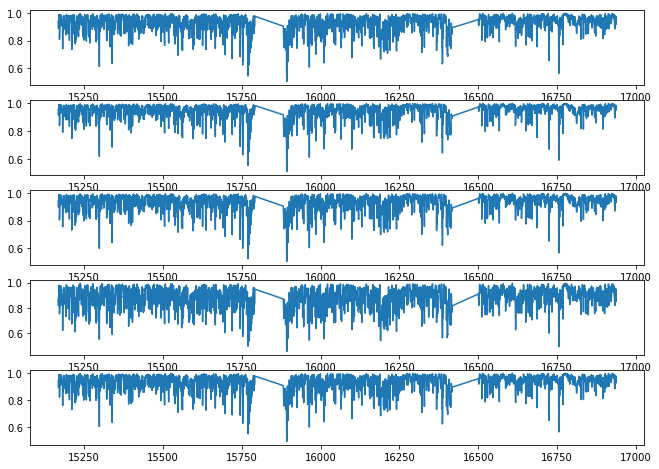

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1)

fig.set_size_inches(11,8)
for i in range(5):
   axs[i].plot(df['waves'], df.iloc[:, i+6])



In [8]:
df.head(10)

,waves,spec05587,spec03289,spec13085,spec03958,spec09624,spec06376,spec09736,spec03735,spec17520,...,spec15150,spec06448,spec01044,spec03335,spec12795,spec19124,spec03948,spec19058,spec10294,spec04806
0,15168.128527,0.937261,0.934554,0.947525,0.949423,0.958757,0.938371,0.953159,0.941284,0.869350,...,0.938703,0.936111,0.896314,0.948318,0.924054,0.825826,0.918925,0.950849,0.906578,0.940714
1,15168.757206,0.924839,0.922429,0.940092,0.941982,0.951652,0.926556,0.946669,0.934022,0.844530,...,0.928373,0.924332,0.879511,0.941908,0.910508,0.803462,0.902527,0.942391,0.892485,0.927797
2,15169.385912,0.885713,0.881910,0.905511,0.907499,0.919119,0.888673,0.913031,0.897957,0.816974,...,0.890952,0.884758,0.845560,0.906727,0.872668,0.794450,0.863400,0.907267,0.855504,0.889021
3,15170.014643,0.913413,0.910496,0.927923,0.929386,0.938415,0.915719,0.933466,0.922161,0.861478,...,0.917093,0.912535,0.883026,0.928476,0.903638,0.842627,0.896888,0.929467,0.890242,0.915990
4,15170.643401,0.956199,0.954915,0.964902,0.965969,0.971843,0.957222,0.968628,0.961389,0.906500,...,0.958078,0.955857,0.928480,0.965570,0.947532,0.878230,0.942915,0.966442,0.936548,0.957930
5,15171.272184,0.989171,0.988865,0.990098,0.990291,0.992292,0.989454,0.990696,0.989089,0.979486,...,0.988890,0.988810,0.982917,0.989392,0.987146,0.973186,0.986863,0.991039,0.983882,0.989748
6,15171.900994,0.967332,0.964406,0.971335,0.972421,0.976949,0.967401,0.973575,0.967543,0.941089,...,0.967453,0.966253,0.949628,0.970954,0.960258,0.915678,0.958866,0.973250,0.953593,0.970021
7,15172.529830,0.813566,0.795565,0.826589,0.834482,0.854102,0.808596,0.839859,0.804465,0.753063,...,0.810907,0.807387,0.754816,0.828210,0.779391,0.667632,0.777107,0.834889,0.766149,0.827287
8,15173.158691,0.856268,0.848864,0.873923,0.877300,0.890751,0.857545,0.882697,0.862765,0.797858,...,0.859541,0.853849,0.816563,0.874595,0.839910,0.767968,0.832743,0.877281,0.824504,0.861712
9,15173.787579,0.945958,0.944276,0.955436,0.956890,0.964639,0.947633,0.960237,0.950965,0.889927,...,0.948019,0.945376,0.913189,0.956421,0.935675,0.857880,0.931027,0.958390,0.921124,0.948670


In [9]:
df.iloc[:, 1]

print(len(df.iloc[:, 1])) # we are dealing with 2405 dimensions here...

2405


> Process the training data. No need to save the wavelength, because we have that from Payne. Good to remember the wavelength we are using is the wavelength[::3].

In [10]:
spectra_df = df.copy()
X_df = spectra_df.iloc[:, 1:] #we are not considering the wavelength here...

X_np = X_df.to_numpy()

X_df.head()

,spec05587,spec03289,spec13085,spec03958,spec09624,spec06376,spec09736,spec03735,spec17520,spec06341,...,spec15150,spec06448,spec01044,spec03335,spec12795,spec19124,spec03948,spec19058,spec10294,spec04806
0,0.937261,0.934554,0.947525,0.949423,0.958757,0.938371,0.953159,0.941284,0.869350,0.940646,...,0.938703,0.936111,0.896314,0.948318,0.924054,0.825826,0.918925,0.950849,0.906578,0.940714
1,0.924839,0.922429,0.940092,0.941982,0.951652,0.926556,0.946669,0.934022,0.844530,0.929883,...,0.928373,0.924332,0.879511,0.941908,0.910508,0.803462,0.902527,0.942391,0.892485,0.927797
2,0.885713,0.881910,0.905511,0.907499,0.919119,0.888673,0.913031,0.897957,0.816974,0.891124,...,0.890952,0.884758,0.845560,0.906727,0.872668,0.794450,0.863400,0.907267,0.855504,0.889021
3,0.913413,0.910496,0.927923,0.929386,0.938415,0.915719,0.933466,0.922161,0.861478,0.917266,...,0.917093,0.912535,0.883026,0.928476,0.903638,0.842627,0.896888,0.929467,0.890242,0.915990
4,0.956199,0.954915,0.964902,0.965969,0.971843,0.957222,0.968628,0.961389,0.906500,0.959184,...,0.958078,0.955857,0.928480,0.965570,0.947532,0.878230,0.942915,0.966442,0.936548,0.957930


In [11]:
X_df.shape

(2405, 1000)

> save the results

In [12]:
np.savetxt('../data/apogee_batch_Xtrain.csv', X_np)

> the label work

In [21]:
spec_ids = X_df.columns
print(spec_ids[:10])

spec_ids_clean = [int(x.replace('spec', '')) for x in spec_ids]
print(spec_ids_clean[:10])

Index(['spec05587', 'spec03289', 'spec13085', 'spec03958', 'spec09624',
       'spec06376', 'spec09736', 'spec03735', 'spec17520', 'spec06341'],
      dtype='object')
[5587, 3289, 13085, 3958, 9624, 6376, 9736, 3735, 17520, 6341]


In [14]:
fn = '../data/weinberg_apogee_precise_labels.npz'

data = load(fn)
lst = data.files

len(data)

teff = data['teff']

len(data['teff'])
print(lst)
print(len(lst)) #24 labels...

['teff', 'logg', 'vturb', 'vmac', 'ch', 'nh', 'ph', 'tih', 'ceh', 'mgh', 'oh', 'sih', 'sh', 'cah', 'nah', 'alh', 'kh', 'crh', 'feh', 'nih', 'vh', 'mnh', 'coh', 'cuh']
24


In [15]:
df_labels = pd.DataFrame()

for item in data.files:
    df_labels[item] = data[item]
    
df_labels.head()

,teff,logg,vturb,vmac,ch,nh,ph,tih,ceh,mgh,...,nah,alh,kh,crh,feh,nih,vh,mnh,coh,cuh
0,4533.500000,2.24,1.426002,2.872531,-0.016722,0.341739,0.024864,0.049664,-0.039500,0.0370,...,-0.1289,-0.0073,0.0720,0.0512,0.0342,0.0140,-0.0645,0.0880,0.0575,0.0914
1,4135.700195,1.59,1.487168,3.260739,-0.028490,0.051850,-0.143363,-0.191645,-0.320385,0.0582,...,-0.2437,-0.0138,0.0580,-0.1748,-0.1738,-0.1020,-0.1079,-0.1521,-0.0200,-0.0207
2,4536.600098,2.45,1.162532,2.789897,0.156178,0.369030,-0.010953,-0.031105,-0.058509,0.1195,...,0.1531,0.0767,0.1225,0.0444,0.0820,0.1210,0.0755,0.1673,0.1539,0.1778
3,4322.899902,1.63,1.703374,4.048507,-0.519896,-0.340700,-0.353843,-0.357755,-0.608485,-0.4242,...,-0.6550,-0.5411,-0.4153,-0.6526,-0.5428,-0.5351,-0.8350,-0.6074,-0.5141,-0.3320
4,4209.600098,1.51,1.713129,3.443646,-0.263520,-0.050260,-0.121933,-0.035065,-0.393525,-0.1516,...,-0.2528,-0.2409,-0.2021,-0.3149,-0.2743,-0.2564,-0.2546,-0.2461,-0.1786,-0.1413


In [16]:
df_lab = df_labels.copy()
df_lab = df_lab.iloc[spec_ids_clean]

In [17]:
df_lab.head()

,teff,logg,vturb,vmac,ch,nh,ph,tih,ceh,mgh,...,nah,alh,kh,crh,feh,nih,vh,mnh,coh,cuh
5587,4275.299805,1.65,1.631586,3.682377,-0.443404,-0.08272,-0.095333,-0.032595,-0.532345,-0.3114,...,-0.3232,-0.2854,-0.3367,-0.4520,-0.3936,-0.3797,-0.3389,-0.3811,-0.2596,-0.1843
3289,4206.299805,1.48,1.785871,3.634005,-0.419027,-0.11489,-0.252663,0.015415,-0.504945,-0.2847,...,-0.5147,-0.3212,-0.2727,-0.3432,-0.3672,-0.3627,-0.2399,-0.3638,-0.2791,-0.1686
13085,4499.399902,2.14,1.354909,3.379692,-0.209413,-0.10640,-0.155213,-0.090255,-0.313595,-0.1392,...,-0.2931,-0.1791,-0.1877,-0.3044,-0.2310,-0.2449,-0.4026,-0.2946,-0.2242,-0.1650
3958,4499.200195,2.12,1.397945,3.470872,-0.273555,-0.11916,-0.396063,-0.225255,-0.263245,-0.1961,...,-0.3108,-0.2240,-0.2480,-0.3004,-0.2823,-0.2586,-0.3852,-0.3181,-0.2490,-0.2118
9624,4289.500000,1.65,1.580447,4.018089,-0.546738,-0.37819,-0.398273,-0.090755,-0.645395,-0.4112,...,-0.7099,-0.4942,-0.4750,-0.5758,-0.5287,-0.5182,-0.5950,-0.5916,-0.4943,-0.3270


In [18]:
df_lab_np = df_lab.to_numpy()

In [19]:
df_lab_np.shape

(1000, 24)

In [20]:
np.savetxt('../data/apogee_batch_ytrain.csv', df_lab_np)